In [1]:
import torch
import numpy as np
from scipy import constants
from scipy import sparse
import matplotlib.pyplot as plt

device = "cuda:0" if torch.cuda.is_available() else "cpu"
print(torch.cuda.get_device_name())

NVIDIA GeForce RTX 3080 Ti


<h3>Computation Domain

In [2]:
N = 100
L = 10
X,Y,Z = np.meshgrid(np.linspace(-L/2,L/2,N,dtype=float),
                       np.linspace(-L/2,L/2,N,dtype=float),
                       np.linspace(-L/2,L/2,N,dtype=float))

Three dimensional time independent schrodinger equation:

$$
\frac{-\hbar^{2}}{2m}\nabla^{2}\Psi+U(x,y,z)\Psi(x,y,z)=E\Psi(x,y,z)
$$
$$
\nabla^{2}\Psi = \frac{\partial^{2}\Psi}{\partial x^{2}}+\frac{\partial^{2}\Psi}{\partial y^{2}}+\frac{\partial^{2}\Psi}{\partial z^{2}}
$$

In [3]:
diag = np.ones([N])
diags = np.array([diag, -2*diag, diag])
D = sparse.spdiags(diags,np.array([-1,0,1]),N,N)
I = np.identity(N)
D1 = sparse.kronsum(D,D)
D2 = sparse.kronsum(D1,D)

In [4]:
D1 = sparse.kronsum(D,D)
D2 = sparse.kronsum(D1,D)

In [5]:
T = -1/2 * D2
epsillon = 1e-18
V = -8.99e9 * ((constants.elementary_charge**2)/constants.physical_constants['Bohr radius'][0])
#V = 0
#V = -1 / (np.sqrt((X)**2+(Y)**2+(Z)**2) + epsillon)
V = V * np.ones([N,N,N])
U = sparse.diags(V.reshape(N**3),(0))
H = U + T

In [6]:
eigenvalues, eigenvectors = sparse.linalg.eigsh(H, k=11,which='SM')
def get_e(n):
    return eigenvectors.T[n].reshape((N,N,N))

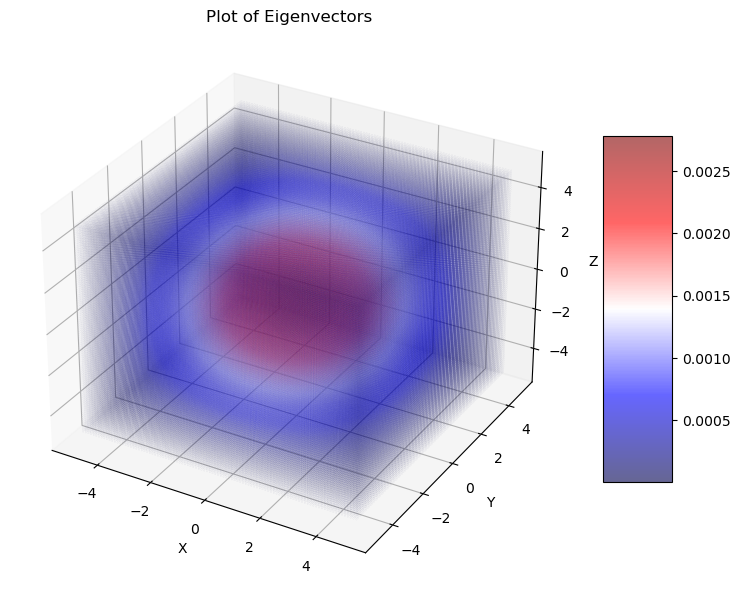

In [9]:
fig = plt.figure(1,figsize=(9,9))
ax = fig.add_subplot(111,projection='3d')
plot1 = ax.scatter3D(X,Y,Z, c=get_e(0),cmap=plt.cm.seismic,s=0.001,alpha=0.6,antialiased=True)
fig.colorbar(plot1,shrink=0.5,aspect=5)
ax.set_xlabel(r'X')
ax.set_ylabel(r'Y')
ax.set_zlabel(r'Z')
ax.set_title('Plot of Eigenvectors')
plt.show()

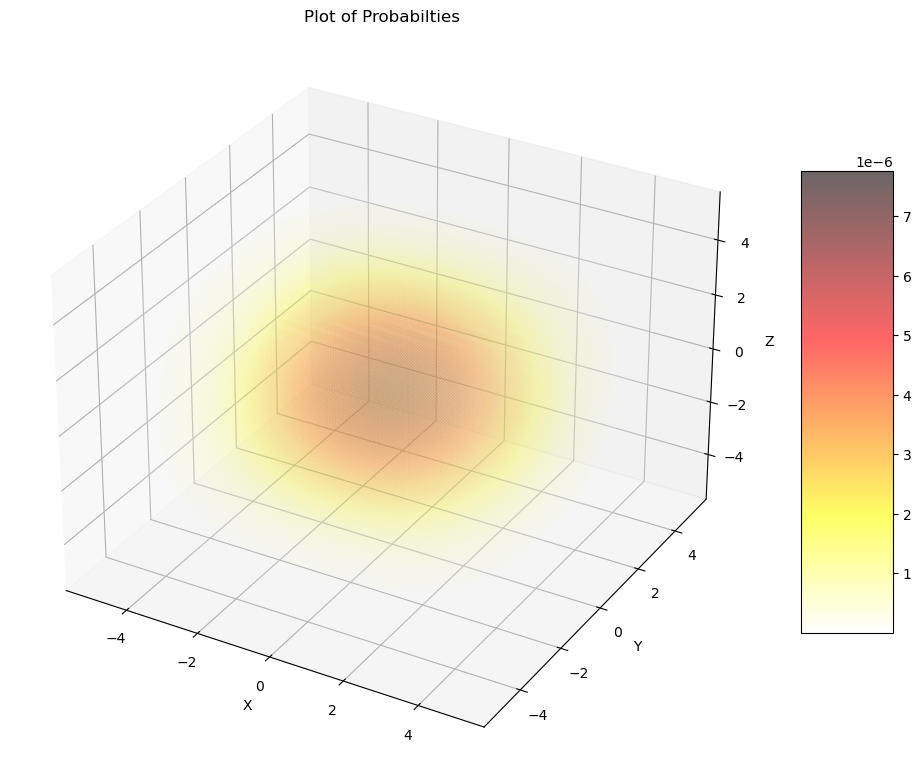

In [8]:
fig = plt.figure(2,figsize=(12,12))
ax = fig.add_subplot(111,projection='3d')
plot2 = ax.scatter3D(X,Y,Z,c=(get_e(0)**2),cmap=plt.cm.hot_r,s=0.001,alpha=0.6,antialiased=True)
fig.colorbar(plot2,shrink=0.5,aspect=5)
ax.set_xlabel(r'X')
ax.set_ylabel(r'Y')
ax.set_zlabel(r'Z')
ax.set_title('Plot of Probabilties')
plt.show()